In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'textblob'

In [2]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("sample_tweets.csv")
df.head()

,date,username,text
0,2023-01-01,user_0,I love this product! Absolutely amazing experi...
1,2023-01-02,user_1,"Terrible customer service, I'm so disappointed."
2,2023-01-03,user_2,"Not bad, but could be better."
3,2023-01-04,user_3,I'm extremely happy with the results!
4,2023-01-05,user_4,Worst purchase ever. Never again.


In [5]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["text"].apply(get_sentiment)
df[["text", "sentiment"]].head()

,text,sentiment
0,I love this product! Absolutely amazing experi...,Positive
1,"Terrible customer service, I'm so disappointed.",Negative
2,"Not bad, but could be better.",Positive
3,I'm extremely happy with the results!,Positive
4,Worst purchase ever. Never again.,Negative


C:\Users\Teknogenetik\AppData\Local\Temp\ipykernel_22604\3045749045.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette="pastel")


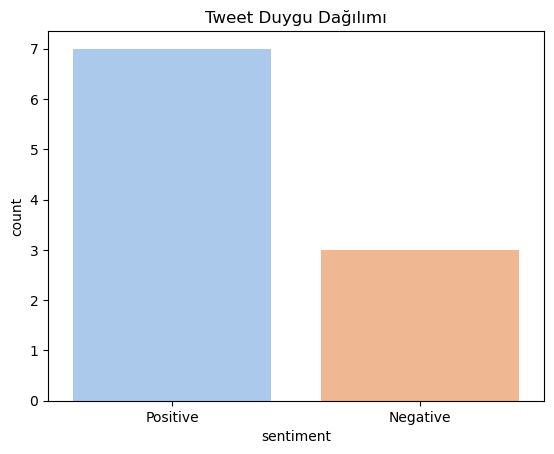

In [6]:
sns.countplot(data=df, x="sentiment", palette="pastel")
plt.title("Tweet Duygu Dağılımı")
plt.show()

In [7]:
df = pd.read_csv("extended_sample_tweets.csv")
df.head()

,date,username,text
0,2023-07-11,user_15,I'm extremely disappointed.
1,2023-01-04,user_78,Absolutely loved the experience. Would recommend!
2,2023-06-27,user_67,Mediocre experience overall.
3,2023-03-15,user_57,"Average product, nothing special."
4,2023-09-26,user_60,It broke after one day.


In [9]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["text"].apply(get_sentiment)

C:\Users\Teknogenetik\AppData\Local\Temp\ipykernel_22604\186556907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette="pastel")


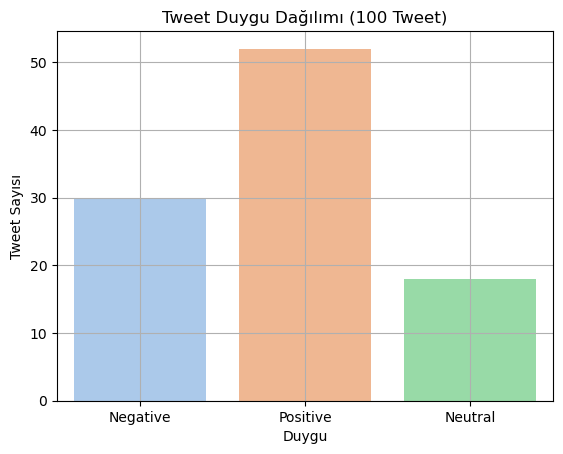

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="sentiment", palette="pastel")
plt.title("Tweet Duygu Dağılımı (100 Tweet)")
plt.xlabel("Duygu")
plt.ylabel("Tweet Sayısı")
plt.grid(True)
plt.show()

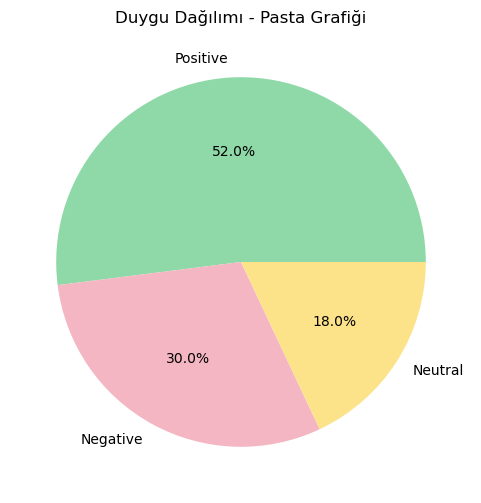

In [11]:
sentiment_counts = df["sentiment"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", colors=["#8fd9a8", "#f4b6c2", "#fce38a"])
plt.title("Duygu Dağılımı - Pasta Grafiği")
plt.show()

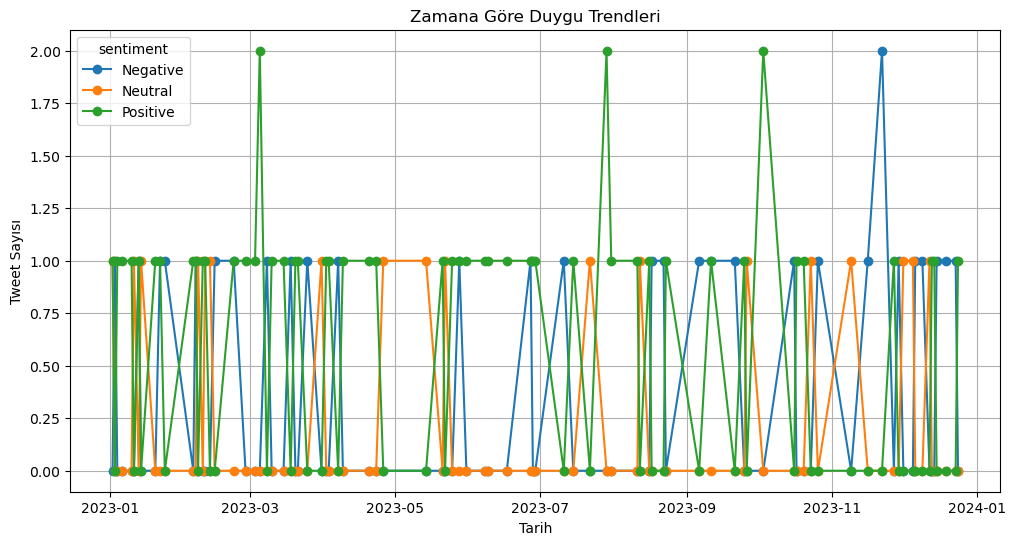

In [12]:
df["date"] = pd.to_datetime(df["date"])

daily_sentiment = df.groupby([df["date"].dt.date, "sentiment"]).size().unstack().fillna(0)

daily_sentiment.plot(kind="line", figsize=(12,6), marker="o")
plt.title("Zamana Göre Duygu Trendleri")
plt.xlabel("Tarih")
plt.ylabel("Tweet Sayısı")
plt.grid(True)
plt.show()

In [13]:
df["length"] = df["text"].apply(len)
df.sort_values(by="length", ascending=False)[["text", "length", "sentiment"]].head(3)

,text,length,sentiment
1,Absolutely loved the experience. Would recommend!,49,Positive
15,Absolutely loved the experience. Would recommend!,49,Positive
27,Absolutely loved the experience. Would recommend!,49,Positive
